<a href="https://colab.research.google.com/github/GGlivePh/QG/blob/main/SelRas_01022025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/GGlivePh/QG

Cloning into 'QG'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 86 (delta 38), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (86/86), 3.27 MiB | 2.70 MiB/s, done.
Resolving deltas: 100% (38/38), done.


In [2]:
import os
os.chdir('QG')

In [3]:
import pandas as pd

In [4]:
data = pd.read_table('Combined_Scan_Protein_Clean.txt', delimiter=' ')

In [5]:
data

,ID,Weight,Alanine,Arginine,Asparagine,Aspartate,Glutamate,Glutamine,Glycine,Histidine,...,X2495,X2495.5,X2496,X2496.5,X2497,X2497.5,X2498,X2498.5,X2499,X2499.5
0,1,0.0906,7.265154,1.261551,0.058280,0.248136,1.670206,2.723248,0.898374,1.079029,...,1.869140,1.869265,1.869395,1.869530,1.869670,1.869825,1.869990,1.870165,1.870350,1.870540
1,2,0.0976,9.304337,0.368340,0.007612,0.209358,1.666892,0.781635,1.011352,1.351668,...,1.874585,1.874825,1.875015,1.875170,1.875295,1.875395,1.875475,1.875535,1.875580,1.875610
2,3,0.0968,6.645977,1.431965,0.079203,0.501955,1.848664,7.996906,1.026568,1.577288,...,1.829445,1.829580,1.829725,1.829880,1.830050,1.830230,1.830410,1.830590,1.830765,1.830920
3,4,0.0940,8.094493,0.290364,0.003514,0.141729,1.000914,0.621943,0.889322,1.859671,...,1.866395,1.866490,1.866620,1.866790,1.866985,1.867215,1.867460,1.867715,1.867970,1.868215
4,5,0.1081,5.100701,1.470762,0.091847,0.274831,1.239337,7.297441,0.730186,1.958292,...,1.781745,1.781765,1.781795,1.781840,1.781905,1.781990,1.782090,1.782210,1.782325,1.782435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,200,0.1089,3.462962,1.437475,0.093459,0.217288,1.085252,5.030417,0.475956,0.751676,...,1.842250,1.842255,1.842290,1.842360,1.842480,1.842645,1.842855,1.843105,1.843380,1.843660
199,201,0.0914,7.058106,0.984051,0.034464,0.533427,5.079187,15.011536,1.084003,4.064709,...,1.747165,1.747260,1.747360,1.747485,1.747640,1.747815,1.748025,1.748250,1.748485,1.748720
200,202,0.0894,4.034694,1.630501,0.123828,0.322686,1.545505,7.776227,0.716317,0.782357,...,1.860340,1.860400,1.860485,1.860575,1.860675,1.860765,1.860845,1.860885,1.860895,1.860850
201,203,0.0845,6.301740,1.876448,0.067258,0.466614,3.831238,26.826830,1.259078,5.925369,...,1.753215,1.753560,1.753860,1.754135,1.754370,1.754580,1.754775,1.754960,1.755140,1.755305


In [8]:
# prompt: build different models including PLS and deep learning to predict the following variables using the rest of columns except ID (Weight Alanine Arginine Asparagine Aspartate Glutamate Glutamine Glycine Histidine Isoleucine Leucine Lysine Methionine Phenylalanine Proline Serine Threonine Tryptophane Tyrosine Valine). Use 20% for test

import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

# Check if the directory exists, and if not, clone the repository
if not os.path.exists('QG'):
    !git clone https://github.com/GGlivePh/QG

# Change to the 'QG' directory
os.chdir('QG')

data = pd.read_table('Combined_Scan_Protein_Clean.txt', delimiter=' ')

# Prepare data
X = data.drop(columns=['ID', 'Weight'])  # Features
y = data[['Weight']]  # Target variable

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# PLS Regression
pls = PLSRegression(n_components=5) # You can adjust the number of components
pls.fit(X_train, y_train)
y_pred_pls = pls.predict(X_test)
mse_pls = mean_squared_error(y_test, y_pred_pls)
print(f"PLS Regression MSE: {mse_pls}")


# Deep Learning Model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1) # Output layer for regression
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0) # Adjust epochs and batch size

y_pred_dl = model.predict(X_test)
mse_dl = mean_squared_error(y_test, y_pred_dl)
print(f"Deep Learning Model MSE: {mse_dl}")

Cloning into 'QG'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 86 (delta 38), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (86/86), 3.27 MiB | 2.53 MiB/s, done.
Resolving deltas: 100% (38/38), done.
PLS Regression MSE: 6.93653934109897e-05


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Deep Learning Model MSE: 0.08192385733127594


In [9]:
# prompt: build different models including PLS and deep learning to predict the following variables using the rest of columns except ID (Weight Alanine Arginine Asparagine Aspartate Glutamate Glutamine Glycine Histidine Isoleucine Leucine Lysine Methionine Phenylalanine Proline Serine Threonine Tryptophane Tyrosine Valine). Use 20% for test

import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy.stats import pearsonr

# Check if the directory exists, and if not, clone the repository
if not os.path.exists('QG'):
    !git clone https://github.com/GGlivePh/QG

# Change to the 'QG' directory
os.chdir('QG')

data = pd.read_table('Combined_Scan_Protein_Clean.txt', delimiter=' ')

# Define target variables
target_variables = ["Weight", "Alanine", "Arginine", "Asparagine", "Aspartate", "Glutamate", "Glutamine", "Glycine", "Histidine"]

# Create a dictionary to store results
results = {}

# Loop through target variables
for target_variable in target_variables:
    # Prepare data
    X = data.drop(columns=['ID', target_variable])  # Features
    y = data[[target_variable]]  # Target variable

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # PLS Regression
    pls = PLSRegression(n_components=5)  # You can adjust the number of components
    pls.fit(X_train, y_train)
    y_pred_pls = pls.predict(X_test)
    rmse_pls = np.sqrt(mean_squared_error(y_test, y_pred_pls))
    corr_pls, _ = pearsonr(y_test[target_variable], y_pred_pls.ravel())  # Calculate Pearson's correlation

    # Deep Learning Model
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1)  # Output layer for regression
    ])

    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)  # Adjust epochs and batch size

    y_pred_dl = model.predict(X_test)
    rmse_dl = np.sqrt(mean_squared_error(y_test, y_pred_dl))
    corr_dl, _ = pearsonr(y_test[target_variable], y_pred_dl.ravel())  # Calculate Pearson's correlation

    # Store results in the dictionary
    results[target_variable] = {
        'PLS Regression': {'RMSE': rmse_pls, 'Pearson Correlation': corr_pls},
        'Deep Learning': {'RMSE': rmse_dl, 'Pearson Correlation': corr_dl}
    }

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame.from_dict({(i, j): results[i][j]
                                    for i in results.keys()
                                    for j in results[i].keys()},
                                   orient='index')

print(results_df)

Cloning into 'QG'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 86 (delta 38), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (86/86), 3.27 MiB | 3.77 MiB/s, done.
Resolving deltas: 100% (38/38), done.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
                               RMSE  Pearson Correlation
Weight     PLS Regression  0.008329             0.206321
           Deep Learning   0.235274            -0.221931
Alanine    PLS Regression  1.545200             0.919128
           Deep Learning   3.926690             0.638765
Arginine   PLS Regression  0.563910             0.808269
           Deep Learning   0.837183             0.683321
Asparagine PLS Regression  0.047410             0.862811
           Deep Learning   1.630938             0.124836
Aspartate  PLS Regression  0.123915             0.662342
           Deep Learning   0.445143             0.025558
Glutamate  PLS Regression  0.636979             0.925921
           Deep Learning   1.050873             0.819500
Glutamine  PLS Regression  5.769909             0.567677
           Deep Learning   7.303789             0.358059
Glycine    PLS Regression  0.391120             0.909034
           Deep Learning   0.720670             0.

In [10]:
# prompt: build different models including PLS and deep learning to predict the following variables using the rest of columns except ID (Weight Alanine Arginine Asparagine Aspartate Glutamate Glutamine Glycine Histidine Isoleucine Leucine Lysine Methionine Phenylalanine Proline Serine Threonine Tryptophane Tyrosine Valine). Use 20% for test

import os
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy.stats import pearsonr

# Check if the directory exists, and if not, clone the repository
if not os.path.exists('QG'):
    !git clone https://github.com/GGlivePh/QG

# Change to the 'QG' directory
os.chdir('QG')

data = pd.read_table('Combined_Scan_Protein_Clean.txt', delimiter=' ')

# Define target variables
target_variables = ["Weight", "Alanine", "Arginine", "Asparagine", "Aspartate", "Glutamate", "Glutamine", "Glycine", "Histidine"]

# Create a dictionary to store results
results = {}

# Loop through target variables
for target_variable in target_variables:
    # Prepare data
    X = data.drop(columns=['ID', target_variable])  # Features
    y = data[[target_variable]]  # Target variable

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Cross-validation for PLS Regression
    best_n_components = 1
    best_rmse_cv = float('inf')

    for n_components in range(1, 11):  # Try n_components from 1 to 10
        rmse_cv_scores = []
        kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

        for train_index, val_index in kf.split(X_train):
            X_train_cv, X_val_cv = X_train[train_index], X_train[val_index]
            y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

            pls_cv = PLSRegression(n_components=n_components)
            pls_cv.fit(X_train_cv, y_train_cv)
            y_pred_cv = pls_cv.predict(X_val_cv)
            rmse_cv_scores.append(np.sqrt(mean_squared_error(y_val_cv, y_pred_cv)))

        avg_rmse_cv = np.mean(rmse_cv_scores)

        if avg_rmse_cv < best_rmse_cv:
            best_rmse_cv = avg_rmse_cv
            best_n_components = n_components

    # Train PLS Regression with the best n_components
    pls = PLSRegression(n_components=best_n_components)
    pls.fit(X_train, y_train)
    y_pred_pls = pls.predict(X_test)
    rmse_pls = np.sqrt(mean_squared_error(y_test, y_pred_pls))
    corr_pls, _ = pearsonr(y_test[target_variable], y_pred_pls.ravel())

    # ... (Deep Learning model code remains the same) ...

    # Store results in the dictionary
    results[target_variable] = {
        'PLS Regression': {'RMSE': rmse_pls, 'Pearson Correlation': corr_pls, 'Best n_components': best_n_components},
        'Deep Learning': {'RMSE': rmse_dl, 'Pearson Correlation': corr_dl}
    }

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame.from_dict({(i, j): results[i][j]
                                    for i in results.keys()
                                    for j in results[i].keys()},
                                   orient='index')

print(results_df)


Cloning into 'QG'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 86 (delta 38), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (86/86), 3.27 MiB | 3.94 MiB/s, done.
Resolving deltas: 100% (38/38), done.
                               RMSE  Pearson Correlation  Best n_components
Weight     PLS Regression  0.008351             0.036321                2.0
           Deep Learning   1.802579             0.937256                NaN
Alanine    PLS Regression  1.037029             0.965604               10.0
           Deep Learning   1.802579             0.937256                NaN
Arginine   PLS Regression  0.373575             0.918843                8.0
           Deep Learning   1.802579             0.937256                NaN
Asparagine PLS Regression  0.031566             0.941954               10.0
           Deep Learning   1.802579             0.937256         

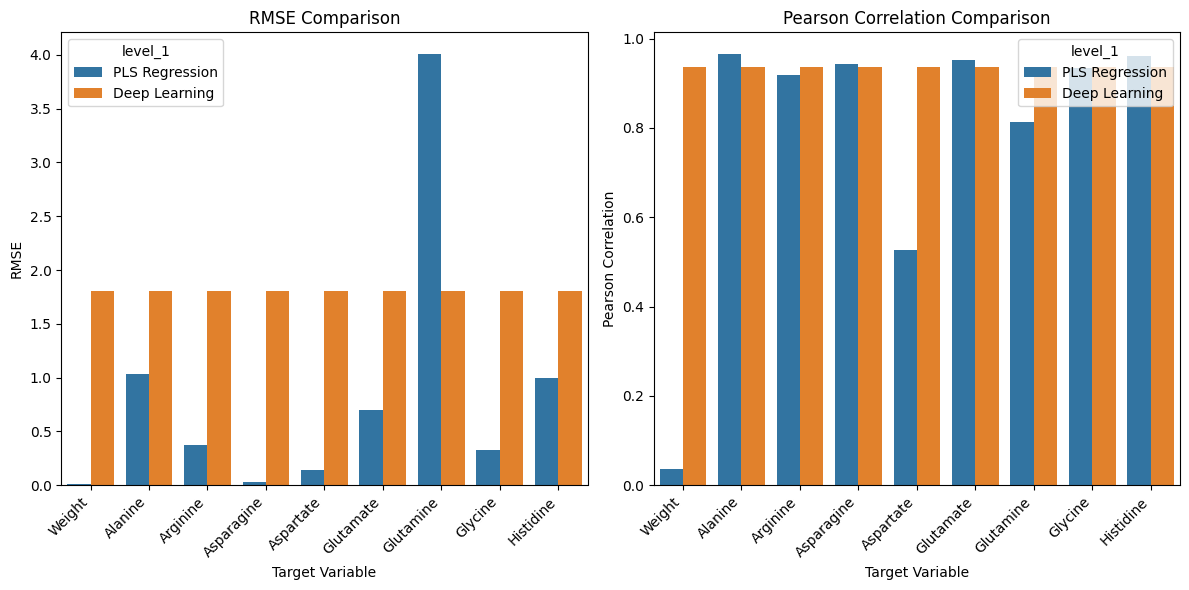

<function matplotlib.pyplot.show(close=None, block=None)>

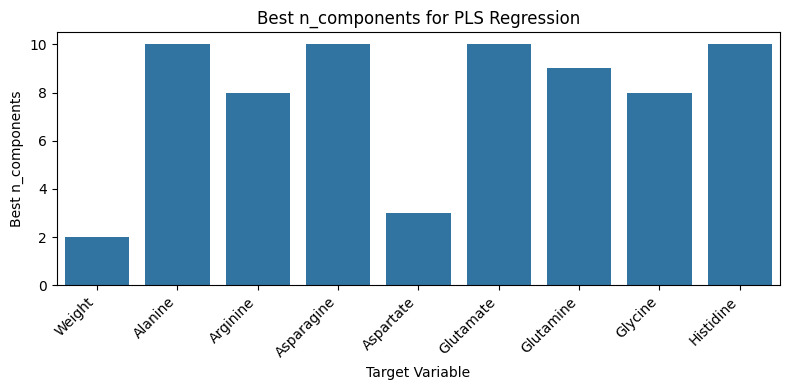

In [11]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# ... (previous code remains the same) ...

# Create plots
plt.figure(figsize=(12, 6))

# 1. RMSE Comparison
plt.subplot(1, 2, 1)
sns.barplot(x="level_0", y="RMSE", hue="level_1", data=results_df.reset_index())
plt.xticks(rotation=45, ha="right")
plt.title("RMSE Comparison")
plt.xlabel("Target Variable")
plt.ylabel("RMSE")

# 2. Pearson Correlation Comparison
plt.subplot(1, 2, 2)
sns.barplot(x="level_0", y="Pearson Correlation", hue="level_1", data=results_df.reset_index())
plt.xticks(rotation=45, ha="right")
plt.title("Pearson Correlation Comparison")
plt.xlabel("Target Variable")
plt.ylabel("Pearson Correlation")

plt.tight_layout()
plt.show()

# 3. Best n_components for PLS Regression
plt.figure(figsize=(8, 4))
pls_results = results_df[results_df.index.get_level_values(1) == 'PLS Regression']
sns.barplot(x=pls_results.index.get_level_values(0), y="Best n_components", data=pls_results.reset_index())
plt.xticks(rotation=45, ha="right")
plt.title("Best n_components for PLS Regression")
plt.xlabel("Target Variable")
plt.ylabel("Best n_components")
plt.tight_layout()
plt.show

Cloning into 'QG'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 86 (delta 38), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (86/86), 3.27 MiB | 3.74 MiB/s, done.
Resolving deltas: 100% (38/38), done.


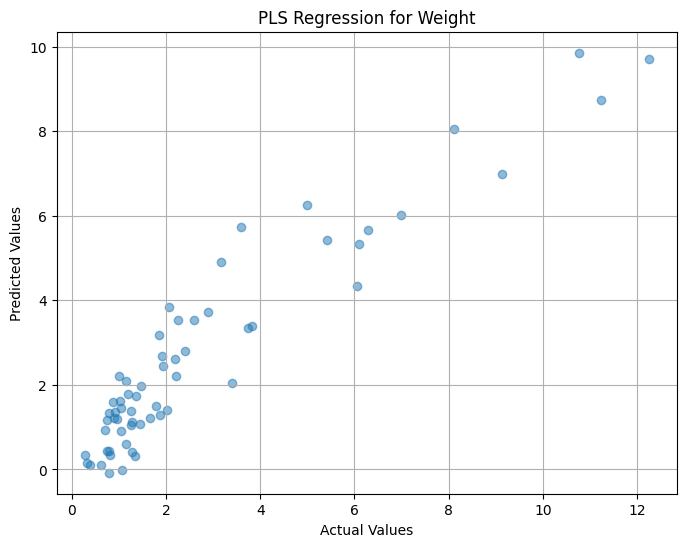

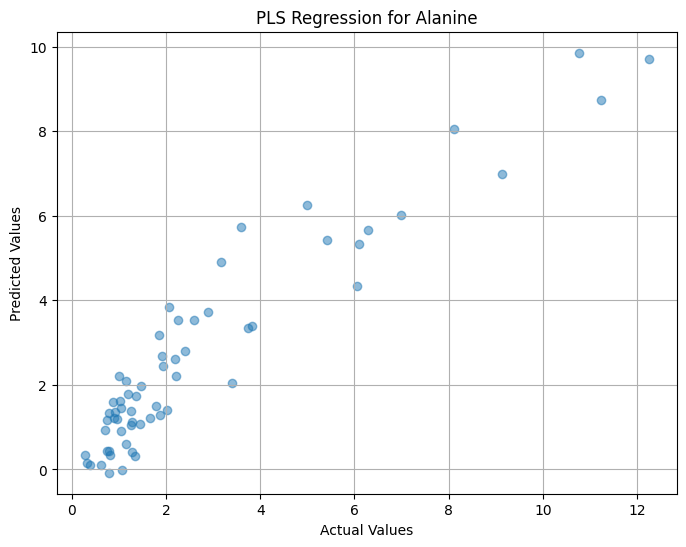

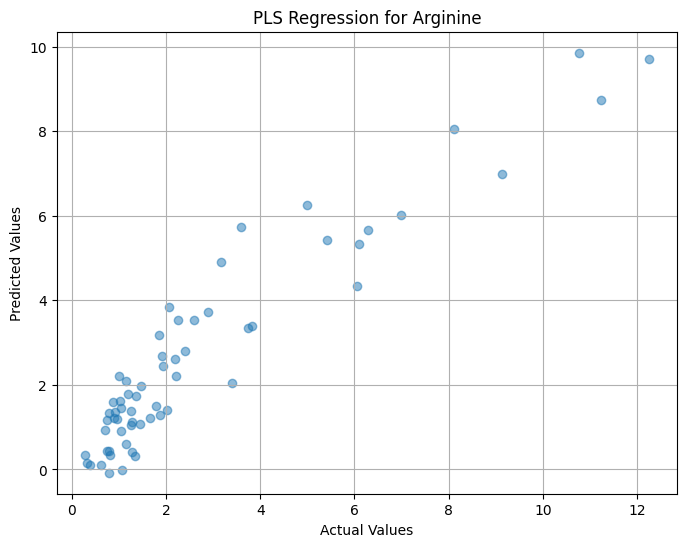

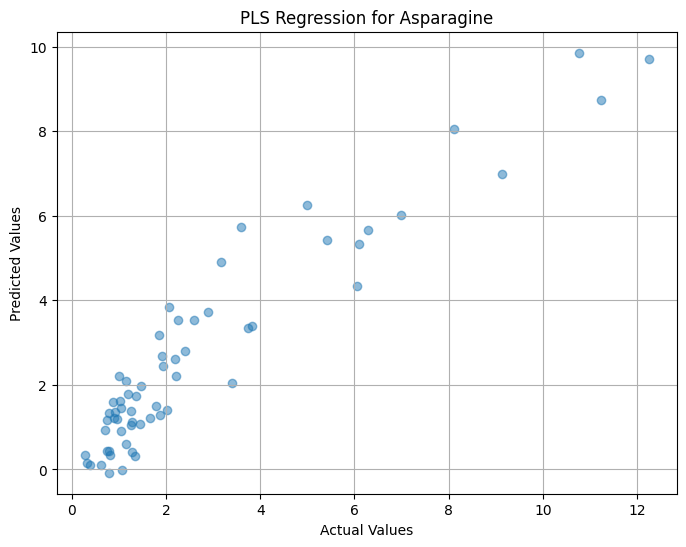

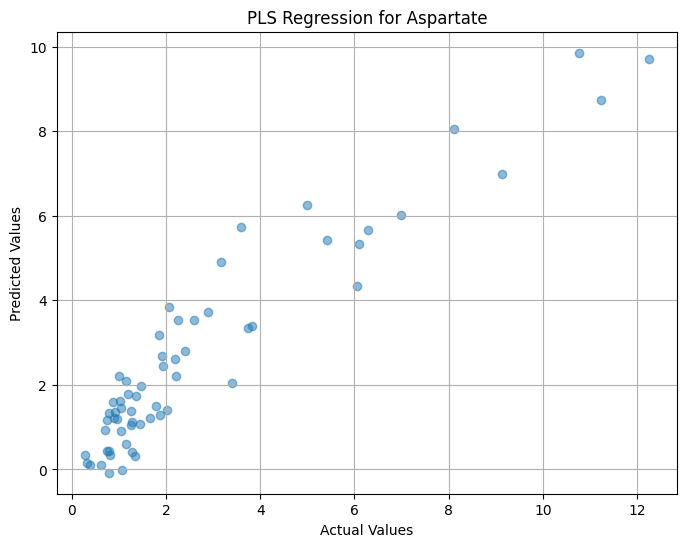

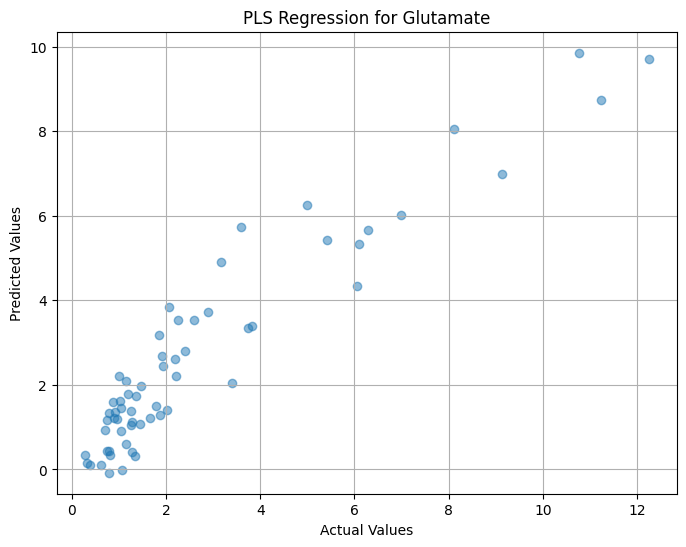

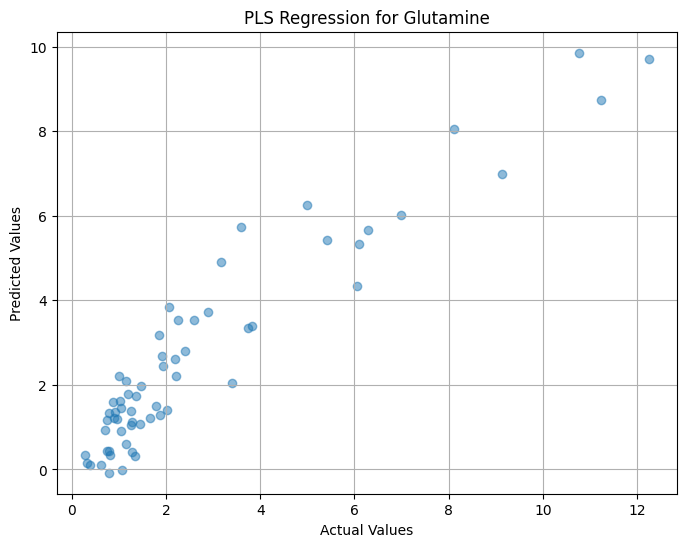

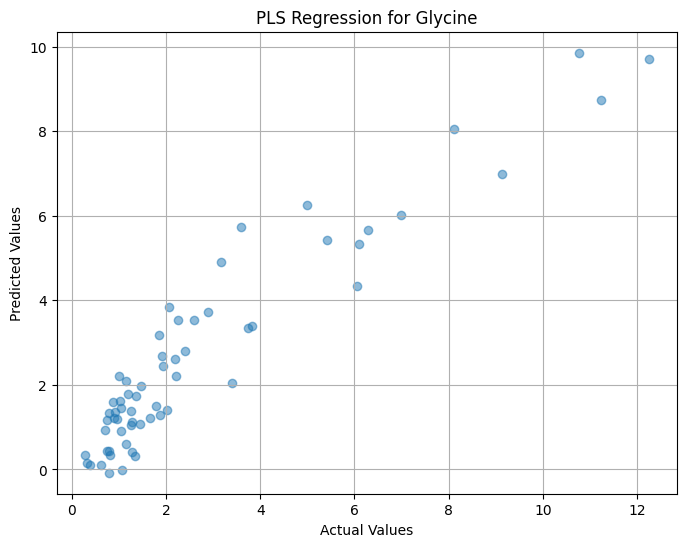

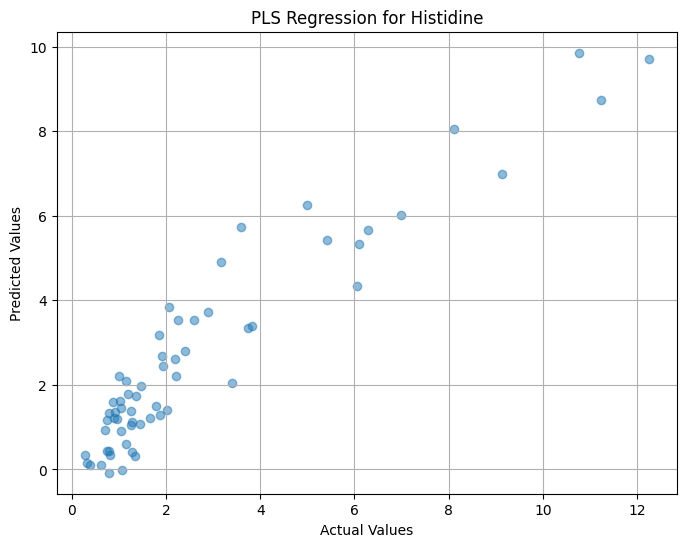

<ipython-input-15-b9fd20a7cfd5>:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")
<ipython-input-15-b9fd20a7cfd5>:136: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha="right")


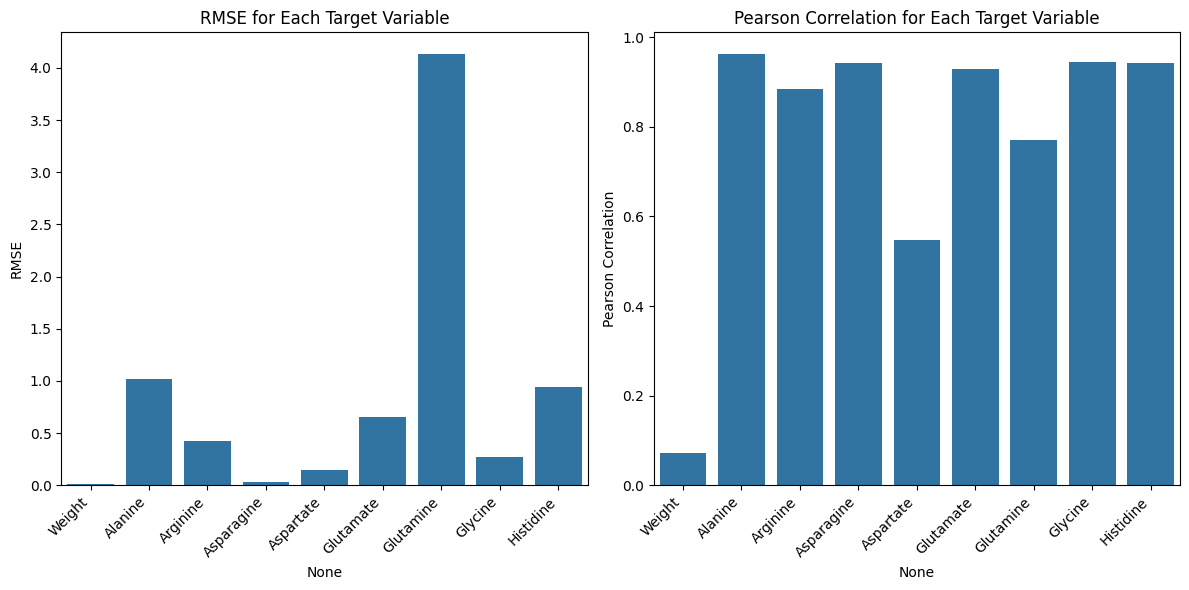

                RMSE  Pearson Correlation  Best n_components
Weight      0.008596             0.073029                  2
Alanine     1.014881             0.962910                 10
Arginine    0.423363             0.884353                  8
Asparagine  0.029718             0.941587                 10
Aspartate   0.142369             0.547744                  5
Glutamate   0.655868             0.929237                  8
Glutamine   4.133750             0.771618                  7
Glycine     0.267207             0.944492                 10
Histidine   0.945808             0.942674                  9

--- Log of Steps ---
Imported necessary libraries
Cloned the repository 'QG'
Changed directory to 'QG'
Loaded data from 'Combined_Scan_Protein_Clean.txt'
Defined target variables
Created a dictionary to store results
Prepared data for target variable: Weight
Scaled features for target variable: Weight
Split data into training and testing sets (70/30) for target variable: Weight
Performe

In [15]:
!pip install -q seaborn matplotlib pandas scikit-learn
import os
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# --- Log of Steps ---
log_steps = []
log_steps.append("Imported necessary libraries")


# Check if the directory exists, and if not, clone the repository
if not os.path.exists('QG'):
    !git clone https://github.com/GGlivePh/QG
    log_steps.append("Cloned the repository 'QG'")
else:
    log_steps.append("Repository 'QG' already exists")


# Change to the 'QG' directory
os.chdir('QG')
log_steps.append("Changed directory to 'QG'")


# Load the data
data = pd.read_table('Combined_Scan_Protein_Clean.txt', delimiter=' ')
log_steps.append("Loaded data from 'Combined_Scan_Protein_Clean.txt'")


# Define target variables
target_variables = ["Weight", "Alanine", "Arginine", "Asparagine", "Aspartate", "Glutamate", "Glutamine", "Glycine", "Histidine"]
log_steps.append("Defined target variables")


# Create a dictionary to store results
results = {}
log_steps.append("Created a dictionary to store results")


# Loop through target variables
for target_variable in target_variables:
    # Prepare data
    X = data.drop(columns=['ID', target_variable])  # Features
    y = data[[target_variable]]  # Target variable
    log_steps.append(f"Prepared data for target variable: {target_variable}")


    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    log_steps.append(f"Scaled features for target variable: {target_variable}")


    # Split data into training and testing sets (70/30 split)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
    log_steps.append(f"Split data into training and testing sets (70/30) for target variable: {target_variable}")


    # Cross-validation for PLS Regression (3-fold)
    best_n_components = 1
    best_rmse_cv = float('inf')

    for n_components in range(1, 11):  # Try n_components from 1 to 10
        rmse_cv_scores = []
        kf = KFold(n_splits=3, shuffle=True, random_state=42)  # 3-fold cross-validation

        for train_index, val_index in kf.split(X_train):
            X_train_cv, X_val_cv = X_train[train_index], X_train[val_index]
            y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

            pls_cv = PLSRegression(n_components=n_components)
            pls_cv.fit(X_train_cv, y_train_cv)
            y_pred_cv = pls_cv.predict(X_val_cv)
            rmse_cv_scores.append(np.sqrt(mean_squared_error(y_val_cv, y_pred_cv)))

        avg_rmse_cv = np.mean(rmse_cv_scores)

        if avg_rmse_cv < best_rmse_cv:
            best_rmse_cv = avg_rmse_cv
            best_n_components = n_components
    log_steps.append(f"Performed 3-fold cross-validation to find best n_components for PLS Regression for target variable: {target_variable}")


    # Train PLS Regression with the best n_components
    pls = PLSRegression(n_components=best_n_components)
    pls.fit(X_train, y_train)
    y_pred_pls = pls.predict(X_test)
    rmse_pls = np.sqrt(mean_squared_error(y_test, y_pred_pls))
    corr_pls, _ = pearsonr(y_test[target_variable], y_pred_pls.ravel())
    log_steps.append(f"Trained PLS Regression with best n_components for target variable: {target_variable}")


    # Store results
    results[target_variable] = {
        'RMSE': rmse_pls,
        'Pearson Correlation': corr_pls,
        'Best n_components': best_n_components
    }
    log_steps.append(f"Stored results for target variable: {target_variable}")


# Create a DataFrame from the results dictionary
results_df = pd.DataFrame.from_dict(results, orient='index')
log_steps.append("Created a DataFrame from the results dictionary")


# --- Plots ---
# 1. Individual Plots for Each Variable
for target_variable in target_variables:
    plt.figure(figsize=(8, 6))
    # Access the target variable's values from the y_test DataFrame using .values
    plt.scatter(y_test.values.ravel(), y_pred_pls.ravel(), alpha=0.5)  # Predicted vs. Actual
    plt.title(f"PLS Regression for {target_variable}")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.grid(True)
    plt.show()
    log_steps.append(f"Created individual plot for target variable: {target_variable}")


# 3. Bar plot for RMSE and Correlation
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x=results_df.index, y=results_df['RMSE'], ax=axes[0])
axes[0].set_title("RMSE for Each Target Variable")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")

sns.barplot(x=results_df.index, y=results_df['Pearson Correlation'], ax=axes[1])
axes[1].set_title("Pearson Correlation for Each Target Variable")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()
log_steps.append("Created bar plots for RMSE and Pearson Correlation")

# Print the results table
print(results_df)
log_steps.append("Printed results table")

# Print the log of steps
print("\n--- Log of Steps ---")
for step in log_steps:
    print(step)

Cloning into 'QG'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 86 (delta 38), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (86/86), 3.27 MiB | 3.94 MiB/s, done.
Resolving deltas: 100% (38/38), done.


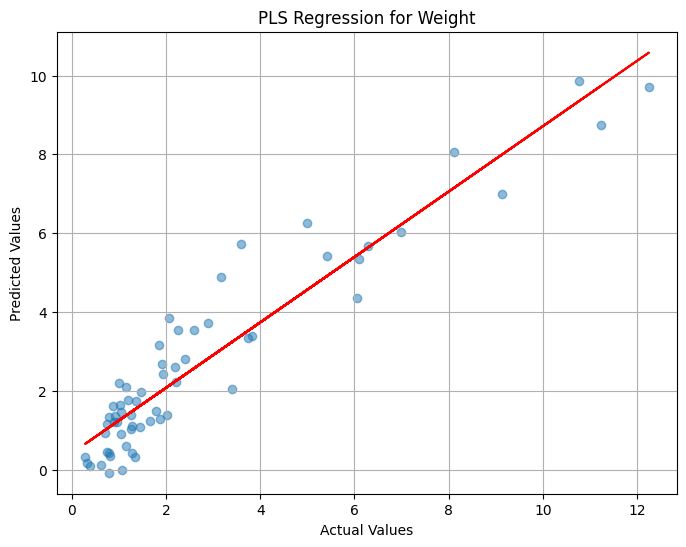

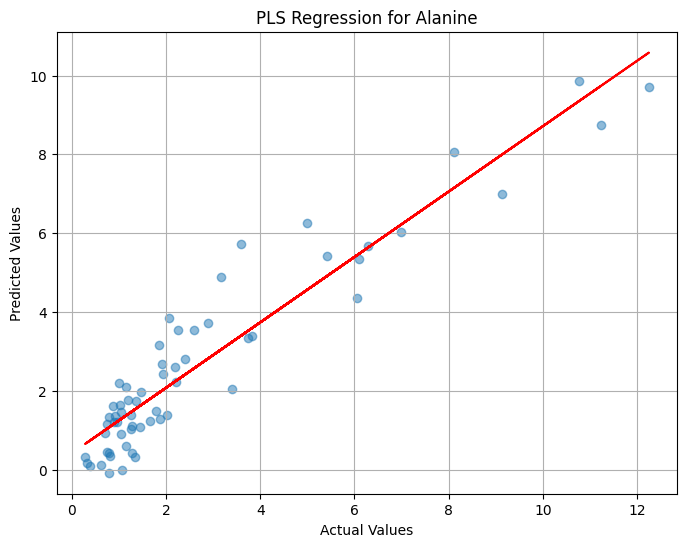

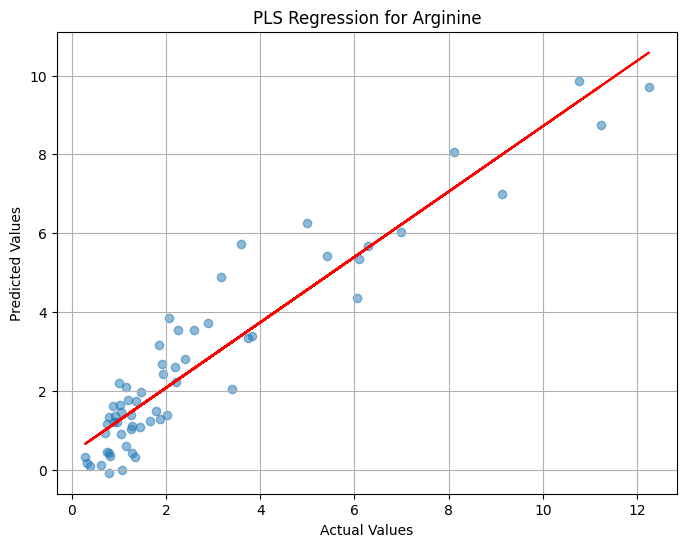

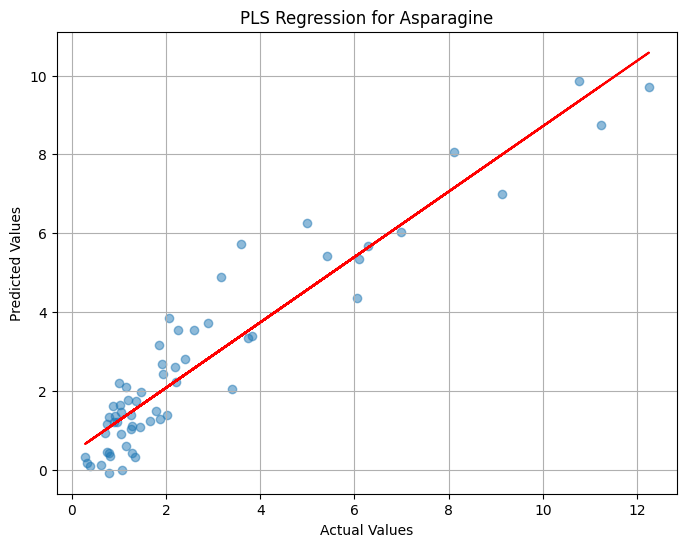

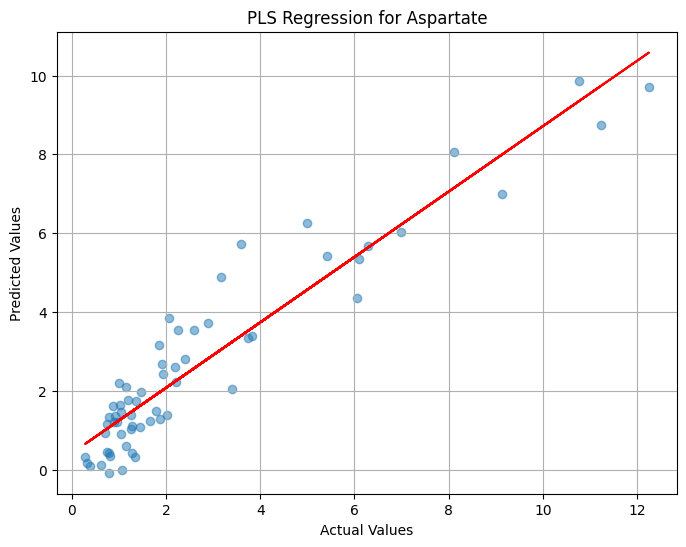

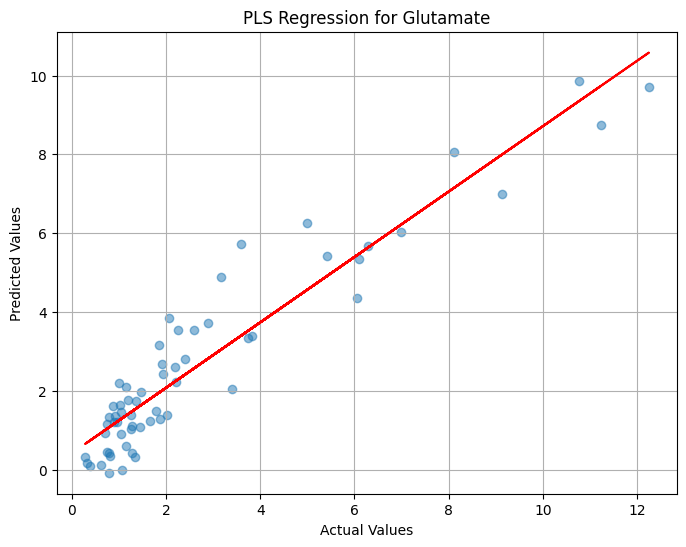

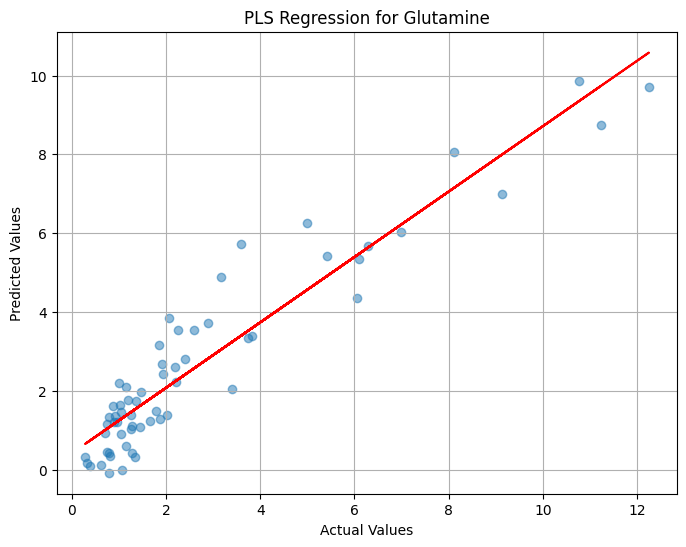

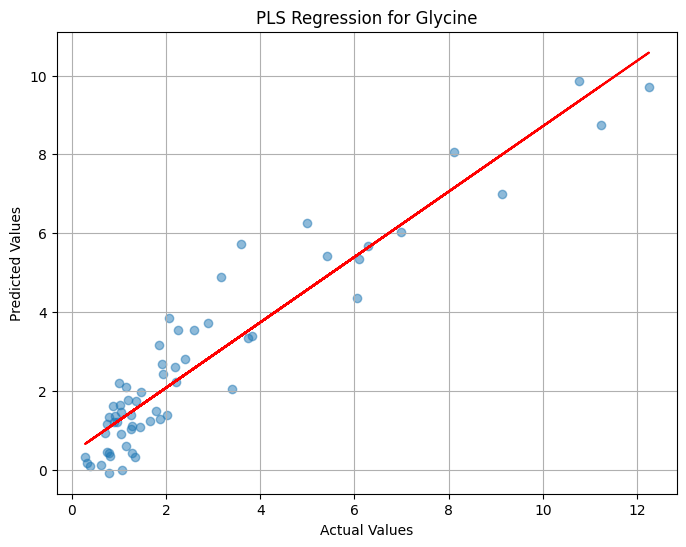

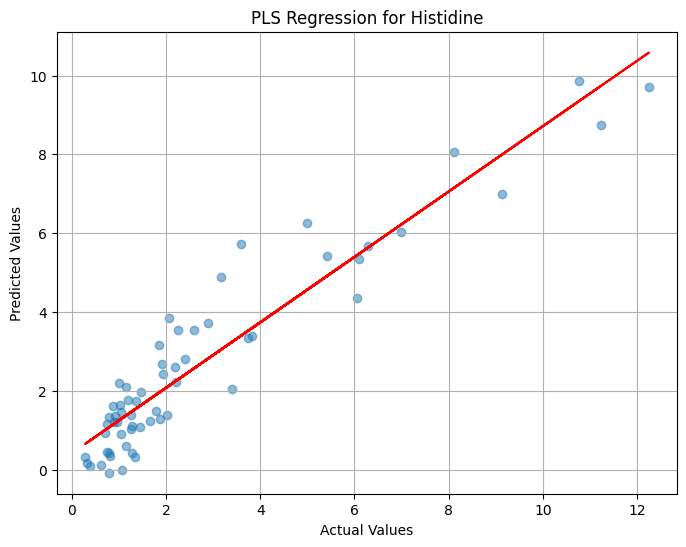

<ipython-input-16-1ceb4f88a8d6>:131: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")
<ipython-input-16-1ceb4f88a8d6>:135: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha="right")
<ipython-input-16-1ceb4f88a8d6>:139: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha="right")


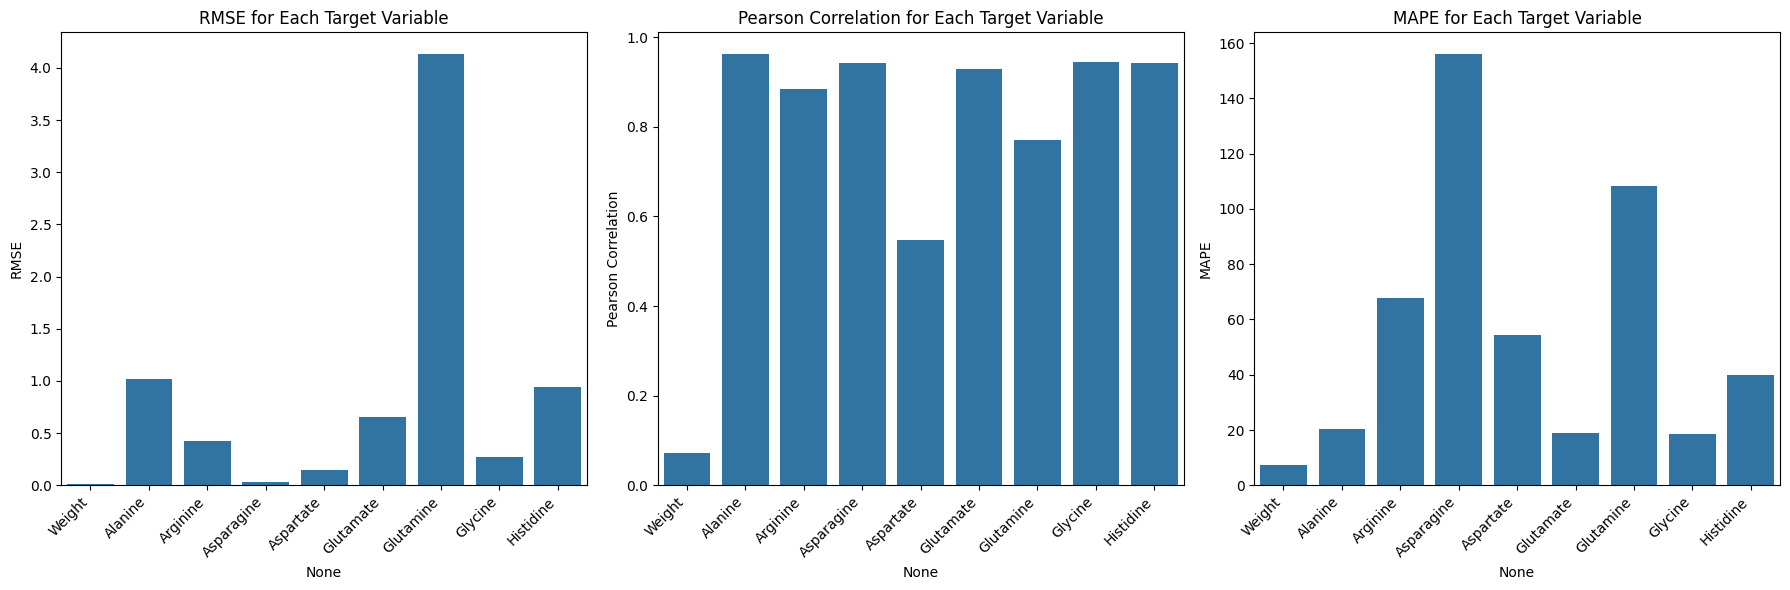

                RMSE  Pearson Correlation        MAPE  Best n_components
Weight      0.008596             0.073029    7.208880                  2
Alanine     1.014881             0.962910   20.455292                 10
Arginine    0.423363             0.884353   67.618435                  8
Asparagine  0.029718             0.941587  156.073325                 10
Aspartate   0.142369             0.547744   54.279676                  5
Glutamate   0.655868             0.929237   18.887104                  8
Glutamine   4.133750             0.771618  108.327322                  7
Glycine     0.267207             0.944492   18.549015                 10
Histidine   0.945808             0.942674   40.018080                  9

--- Log of Steps ---
Imported necessary libraries
Cloned the repository 'QG'
Changed directory to 'QG'
Loaded data from 'Combined_Scan_Protein_Clean.txt'
Defined target variables
Created a dictionary to store results
Prepared data for target variable: Weight
Scaled fea

In [16]:
!pip install -q seaborn matplotlib pandas scikit-learn
import os
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# --- Log of Steps ---
log_steps = []
log_steps.append("Imported necessary libraries")

# Check if the directory exists, and if not, clone the repository
if not os.path.exists('QG'):
    !git clone https://github.com/GGlivePh/QG
    log_steps.append("Cloned the repository 'QG'")
else:
    log_steps.append("Repository 'QG' already exists")

# Change to the 'QG' directory
os.chdir('QG')
log_steps.append("Changed directory to 'QG'")

# Load the data
data = pd.read_table('Combined_Scan_Protein_Clean.txt', delimiter=' ')
log_steps.append("Loaded data from 'Combined_Scan_Protein_Clean.txt'")

# Define target variables
target_variables = ["Weight", "Alanine", "Arginine", "Asparagine", "Aspartate", "Glutamate", "Glutamine", "Glycine", "Histidine"]
log_steps.append("Defined target variables")

# Create a dictionary to store results
results = {}
log_steps.append("Created a dictionary to store results")

# Loop through target variables
for target_variable in target_variables:
    # Prepare data
    X = data.drop(columns=['ID', target_variable])  # Features
    y = data[[target_variable]]  # Target variable
    log_steps.append(f"Prepared data for target variable: {target_variable}")

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    log_steps.append(f"Scaled features for target variable: {target_variable}")

    # Split data into training and testing sets (70/30 split)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
    log_steps.append(f"Split data into training and testing sets (70/30) for target variable: {target_variable}")

    # Cross-validation for PLS Regression (3-fold)
    best_n_components = 1
    best_rmse_cv = float('inf')

    for n_components in range(1, 11):  # Try n_components from 1 to 10
        rmse_cv_scores = []
        kf = KFold(n_splits=3, shuffle=True, random_state=42)  # 3-fold cross-validation

        for train_index, val_index in kf.split(X_train):
            X_train_cv, X_val_cv = X_train[train_index], X_train[val_index]
            y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

            pls_cv = PLSRegression(n_components=n_components)
            pls_cv.fit(X_train_cv, y_train_cv)
            y_pred_cv = pls_cv.predict(X_val_cv)
            rmse_cv_scores.append(np.sqrt(mean_squared_error(y_val_cv, y_pred_cv)))

        avg_rmse_cv = np.mean(rmse_cv_scores)

        if avg_rmse_cv < best_rmse_cv:
            best_rmse_cv = avg_rmse_cv
            best_n_components = n_components
    log_steps.append(f"Performed 3-fold cross-validation to find best n_components for PLS Regression for target variable: {target_variable}")

    # Train PLS Regression with the best n_components
    pls = PLSRegression(n_components=best_n_components)
    pls.fit(X_train, y_train)
    y_pred_pls = pls.predict(X_test)
    rmse_pls = np.sqrt(mean_squared_error(y_test, y_pred_pls))
    corr_pls, _ = pearsonr(y_test[target_variable], y_pred_pls.ravel())
    mape_pls = mean_absolute_percentage_error(y_test[target_variable], y_pred_pls.ravel())  # Calculate MAPE
    log_steps.append(f"Trained PLS Regression with best n_components for target variable: {target_variable}")

    # Store results
    results[target_variable] = {
        'RMSE': rmse_pls,
        'Pearson Correlation': corr_pls,
        'MAPE': mape_pls,  # Store MAPE in results
        'Best n_components': best_n_components
    }
    log_steps.append(f"Stored results for target variable: {target_variable}")

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame.from_dict(results, orient='index')
log_steps.append("Created a DataFrame from the results dictionary")

# --- Plots ---
# 1. Individual Plots for Each Variable with Regression Line
for target_variable in target_variables:
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test.values.ravel(), y_pred_pls.ravel(), alpha=0.5)  # Predicted vs. Actual

    # Add regression line
    m, b = np.polyfit(y_test.values.ravel(), y_pred_pls.ravel(), 1)  # Calculate slope (m) and y-intercept (b)
    plt.plot(y_test.values.ravel(), m * y_test.values.ravel() + b, color='red')  # Plot regression line

    plt.title(f"PLS Regression for {target_variable}")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.grid(True)
    plt.show()
    log_steps.append(f"Created individual plot for target variable: {target_variable}")

# 3. Bar plot for RMSE, Correlation, and MAPE
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 3 subplots for RMSE, Correlation, and MAPE

sns.barplot(x=results_df.index, y=results_df['RMSE'], ax=axes[0])
axes[0].set_title("RMSE for Each Target Variable")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")

sns.barplot(x=results_df.index, y=results_df['Pearson Correlation'], ax=axes[1])
axes[1].set_title("Pearson Correlation for Each Target Variable")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha="right")

sns.barplot(x=results_df.index, y=results_df['MAPE'], ax=axes[2])  # Bar plot for MAPE
axes[2].set_title("MAPE for Each Target Variable")
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()
log_steps.append("Created bar plots for RMSE, Pearson Correlation, and MAPE")

# Print the results table
print(results_df)
log_steps.append("Printed results table")

# Print the log of steps
print("\n--- Log of Steps ---")
for step in log_steps:
    print(step)